

# Project: Investigate dataset “income per capita” and other sets to find what parameter or set of them have more influence on income of people in Belarus and other countries that stay in same income per capita group.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have chosen next data sets: "Income per capita", "Debt to foreigns", "Electricity generated", "Happy score index", "Human developments index", "Trade balance", "Population total".
The main question to this sets is highlighted in the project name.
Also, I want to investigate how different countries that have the same income as Belarus in 1990, grown and what parameters from choosen list have more influence on their growth.


In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [235]:
#First of all let's make df and explore them
hap_score = pd.read_csv('hapiscore_whr.csv')
foreign_depts = pd.read_csv('debt_to_foreigners_by_public_and_private_percent_of_gni.csv')
elect_generated = pd.read_csv('electricity_generation_total.csv')
human_develop = pd.read_csv('hdi_human_development_index.csv')
income_per_capita = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
pop_total = pd.read_csv('population_total.csv')
trade_bal = pd.read_csv('trade_balance_us_not_inflation_adjusted.csv')

<a id='wrangling'></a>
## Data Wrangling

In [236]:
df_list = [hap_score,foreign_depts,elect_generated,human_develop,income_per_capita,pop_total,trade_bal] #make iterabel list of data frames
df_names = ['happy_score','foreign_depts','electricity_generated','human_develop','income_per_capita','population_total','trade_balance'] #make same list of names
for df, name in zip(df_list,df_names): #look at datasets info
    print('\n',name)
    print(df.info())


 happy_score
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     113 non-null    float64
 6   2010     123 non-null    float64
 7   2011     145 non-null    float64
 8   2012     140 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     134 non-null    float64
 15  2019     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB
None

 foreign_depts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 51 columns):
 #   Column   Non

In [237]:
for df, name in zip(df_list,df_names): #look at datasets head
    print('\n',name)
    print(df.head(1))
#Funny thing down there: datasets of income have information up to the year 2040, and population total got information up to the year 2100. Maybe authors know something about our future?


 happy_score
       country  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
0  Afghanistan   NaN   NaN   NaN  37.2  44.0  47.6  38.3  37.8  35.7  31.3   

   2015  2016  2017  2018  2019  
0  39.8  42.2  26.6  26.9  25.7  

 foreign_depts
       country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

   2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
0  15.3  14.0  12.9  12.5  12.4  12.9  13.3  13.5  13.6  13.7  

[1 rows x 51 columns]

 electricity_generated
                country   1985   1986   1987   1988   1989   1990   1991  \
0  United Arab Emirates  12.2B  12.8B  13.7B  14.8B  15.6B  17.1B  17.2B   

    1992   1993  ...   2010   2011  2012  2013  2014  2015  2016  2017  2018  \
0  18.7B  21.7B  ...  93.9B  99.1B  106B  110B  117B  127B  130B  135B  136B   

   2019  
0  138B  

[1 rows x 36 columns]

 human_develop
       country   1990   1991   1992   1993

In [238]:
#let's check how many columns have each dataste
df_columns = [x.columns for x in df_list] #this make list of lists of columns in each dataset, so i can check length of them
for length, names in zip(df_columns,df_names):
    print(names, len(length))

happy_score 16
foreign_depts 51
electricity_generated 36
human_develop 30
income_per_capita 242
population_total 302
trade_balance 61


In case that I want to have a look at the behavior of different countries threw the year 1990 let's define a function to ease those steps in future

In [239]:
def create_country_df(country_df, df_lists, df_columns,df_names,country_name):
    x=0 #need this counter to ease my access to names of columns
    for df in df_lists:
        if ''.join(df_columns[1:]) in ''.join(df.columns):  #check if data frame that we plan to join has the same columns as the initial data frame (this is done to remove exceptions)
            country_df = country_df.append(df.loc[df.country == country_name,df_columns]) # if the data frame has the same set of columns we slice only columns that we need and append them
        else:
            country_df = country_df.append(df.loc[df.country == country_name]) #if not, we join columns that new data frame already have
        country_df.iloc[x,0] = df_names[x] #add the name to the row, so we can identify it
        x+=1
    country_df = country_df.swapaxes('index','columns')[1:] #swap axes of data frame so information in columns stored in the normal way. Also, drop the first row, this row contains column names
    country_df.columns = df_names #before this action column names were named using indices
    country_df.reset_index(inplace=True) #in indices before this action was stored information about years. Now we have column with years.
    country_df.rename(columns = {'index':'year'}, inplace = True)
    return country_df

#### As my main goal is to check how Belarus is growing since the 1990 let's make one dataset that contains all parameters associated with Belarus

In [240]:
#Human developments index have all years that I want to investigate so let's use it columns to make data frame of Belarus
df_columns = list(human_develop.columns)+['2019']
belarus_df = pd.DataFrame(columns=df_columns) #create empty data frame for Belarus
belarus_df = create_country_df(belarus_df,df_list,df_columns,df_names,'Belarus') #let's create data frame that contains different information only about Belarus
belarus_df

,year,happy_score,foreign_depts,electricity_generated,human_develop,income_per_capita,population_total,trade_balance
0,1990,NaN,NaN,39.5B,NaN,8370,10.2M,500M
1,1991,NaN,NaN,38.7B,NaN,8260,10.2M,0
2,1992,NaN,NaN,37.6B,NaN,7450,10.2M,370M
3,1993,NaN,5.95,33.4B,NaN,6870,10.1M,−2.56B
4,1994,NaN,8.73,31.4B,NaN,6070,10.1M,−1.92B
5,1995,NaN,12.2,24.9B,0.656,5460,10.1M,−613M
6,1996,NaN,13.3,23.7B,0.661,5630,10M,−601M
7,1997,NaN,14.8,26.1B,0.667,6300,10M,−819M
8,1998,NaN,15.8,23.5B,0.671,6860,9.97M,−739M
9,1999,NaN,22.3,26.5B,0.676,7130,9.92M,−295M


### Data Cleaning 

In [241]:
belarus_df.info() #all my columns contains objects, but let's check up for sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   30 non-null     object
 1   happy_score            14 non-null     object
 2   foreign_depts          27 non-null     object
 3   electricity_generated  30 non-null     object
 4   human_develop          24 non-null     object
 5   income_per_capita      30 non-null     object
 6   population_total       30 non-null     object
 7   trade_balance          30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [242]:
#let's clear data. First of all: indecies should be in range 0-10, all money will be represented in 'per capita' in thousands.
#in case that we shoul repeat this with other countries, let's try to create function for this.
problem = belarus_df.trade_balance[3][0] #catch problem there: symbol '−' cannot be converted to float. So let's store it for future replacements in function
def data_wrangl(df,problem):
    df.happy_score = df.happy_score.astype('float')/10 #change type of data from string to float
    df.population_total = df.population_total.apply(lambda x: float(x[:-1])) #remove M in end of each string and convert string to float
    df.foreign_depts = df.foreign_depts.astype('float')/df.population_total #change type of data from string to float multiply by 1000 (values is stored in billions) and divide by population
    df.human_develop = df.human_develop.astype('float')*10 #change type of data from string to float and multiply by 10 so all indecies be in same range
    if 'electricity_generated' in df.columns: #accidentally discovered that some countries do not have information in this DF
        df.electricity_generated = df.electricity_generated.apply(lambda x: float(x[:-1]))/df.population_total #remove B in edn of each string and convert string to float
    df.income_per_capita = df.income_per_capita.apply(lambda x: float(x[:-1]) if 'k' in x else float(x)/1000) #convert all values to thousands
    df.trade_balance = df.trade_balance.astype('str')
    df.trade_balance = df.trade_balance.apply(lambda x: x.replace(problem,'-')) #replaced problematic symbol with normal dash, so now it could be converted to float.
    df.trade_balance = df.trade_balance.apply(lambda x: float(x[:-1])*1000 if 'B' in x else (float(x[:-1]) if 'M' in x else float(x)))/df.population_total/1000 #conver to float and then transfrom all values thousands per capita
    return df



In [243]:
belarus_df = data_wrangl(belarus_df,problem)
belarus_df

,year,happy_score,foreign_depts,electricity_generated,human_develop,income_per_capita,population_total,trade_balance
0,1990,NaN,NaN,3.872549,NaN,8.37,10.20,0.049020
1,1991,NaN,NaN,3.794118,NaN,8.26,10.20,0.000000
2,1992,NaN,NaN,3.686275,NaN,7.45,10.20,0.036275
3,1993,NaN,0.589109,3.306931,NaN,6.87,10.10,-0.253465
4,1994,NaN,0.864356,3.108911,NaN,6.07,10.10,-0.190099
5,1995,NaN,1.207921,2.465347,6.56,5.46,10.10,-0.060693
6,1996,NaN,1.330000,2.370000,6.61,5.63,10.00,-0.060100
7,1997,NaN,1.480000,2.610000,6.67,6.30,10.00,-0.081900
8,1998,NaN,1.584754,2.357071,6.71,6.86,9.97,-0.074122
9,1999,NaN,2.247984,2.671371,6.76,7.13,9.92,-0.029738


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which of given parameters have most influence in income per capita)

In [244]:
belarus_df.corr() #let's check correlation of values

,happy_score,foreign_depts,electricity_generated,human_develop,income_per_capita,population_total,trade_balance
happy_score,1.000000,-0.301039,-0.327840,-0.128430,-0.044104,-0.037140,-0.026666
foreign_depts,-0.301039,1.000000,0.717651,0.896070,0.889804,-0.773387,0.127996
electricity_generated,-0.327840,0.717651,1.000000,0.915563,0.680816,-0.395615,-0.058747
human_develop,-0.128430,0.896070,0.915563,1.000000,0.996777,-0.939094,-0.121779
income_per_capita,-0.044104,0.889804,0.680816,0.996777,1.000000,-0.899714,-0.113326
population_total,-0.037140,-0.773387,-0.395615,-0.939094,-0.899714,1.000000,0.222952
trade_balance,-0.026666,0.127996,-0.058747,-0.121779,-0.113326,0.222952,1.000000


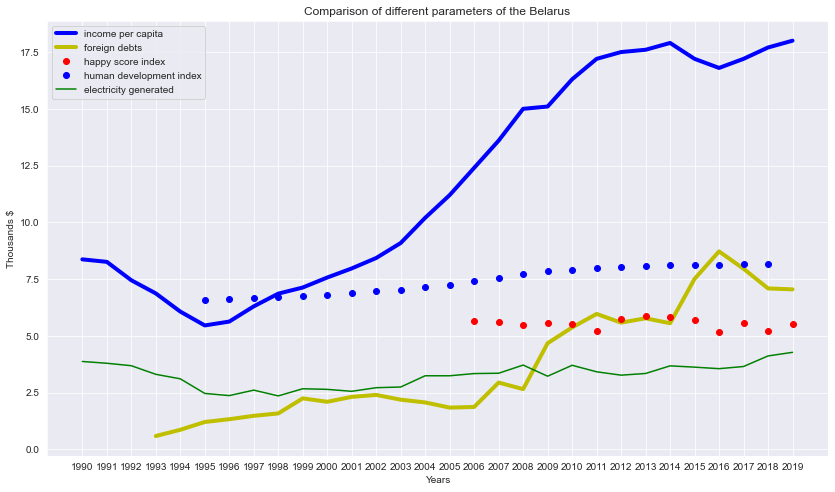

In [255]:
def plotting(df,country):
    df.index = list(df.year) #to ease labeling plot
    sns.set_style('darkgrid')
    plt.figure(figsize=(14,8))
    plt.plot(df.income_per_capita,'b-',label = 'income per capita', lw = 4)
    plt.plot(df.foreign_depts,'y-',label = 'foreign debts', lw = 4)
    plt.plot(df.happy_score,'ro',label = 'happy score index')
    plt.plot(df.human_develop,'bo', label = 'human development index')
    if 'electricity_generated' in df:
        plt.plot(df.electricity_generated, 'g', label = 'electricity generated')
    plt.xlabel('Years')
    plt.ylabel('Thousands $')
    plt.title('Comparison of different parameters of the {}'.format(country))
    plt.legend()

plotting(belarus_df,'Belarus')

As can be seen from the df.corr () table, the human development index and external debt have the greatest correlation with per capita income. The graphs show the same picture.

### Research Question 2  How grow different countries with the same income as Belarus in 1990

In [197]:
#Let's find what countries got same income as Belarus in 1990
clear_pattern = [x for x in set(''.join(income_per_capita['1990'])) if not x.isdigit()] #checking what non digit symbols contains column 1990 in 'income per capita' data frame
clear_pattern


['k', '.']

In [198]:
#Creating df from income per capita df which has only 2 columns: country and year. Also convert information in year column to float.
compare_countries_df = income_per_capita.loc[:,['country','1990']]
compare_countries_df.loc[:,'1990'] = compare_countries_df.loc[:,'1990'].apply(lambda x: float(x[:-1]) if 'k' in x else float(x)/1000)

In [199]:
bel_inc = float(compare_countries_df.query('country == "Belarus"')['1990']) #let's find what income have Belarus in 1990
countries = compare_countries_df[compare_countries_df['1990'] > bel_inc*0.95] #create DF with countries that had an income per person lower than Belarus income by 5%
countries = countries[countries['1990'] < bel_inc *1.05] #filter previously created DF so income per person wan't be higher than Belarus income by 5%
countries

,country,1990
20,Belarus,8.37
27,Botswana,8.50
62,Georgia,7.98
172,Turkmenistan,8.32


In [200]:
#lets check does we have these countries in all data sets:
for name in list(countries.country)[1:]:
    for df, df_name in zip(df_list,df_names):
        print(name, name in list(df.country), df_name)



Botswana True happy_score
Botswana True foreign_depts
Botswana False electricity_generated
Botswana True human_develop
Botswana True income_per_capita
Botswana True population_total
Botswana True trade_balance
Georgia True happy_score
Georgia True foreign_depts
Georgia False electricity_generated
Georgia True human_develop
Georgia True income_per_capita
Georgia True population_total
Georgia True trade_balance
Turkmenistan True happy_score
Turkmenistan True foreign_depts
Turkmenistan True electricity_generated
Turkmenistan True human_develop
Turkmenistan True income_per_capita
Turkmenistan True population_total
Turkmenistan True trade_balance


In [224]:
#lets create df_list and df_names w/o electricity generated
df_list_wo_elect = [hap_score,foreign_depts,human_develop,income_per_capita,pop_total,trade_bal] #make iterabel list of data frames
df_names_wo_elect = ['happy_score','foreign_depts','human_develop','income_per_capita','population_total','trade_balance'] #make same list of names

In [268]:
#create clear df for each country in list
georgia_df = pd.DataFrame(columns=df_columns) 
georgia_df  = create_country_df(georgia_df ,df_list_wo_elect,df_columns,df_names_wo_elect,'Georgia') 
georgia_df  = data_wrangl(georgia_df ,problem)
botswana_df = pd.DataFrame(columns=df_columns)
botswana_df  = create_country_df(botswana_df ,df_list_wo_elect,df_columns,df_names_wo_elect,'Botswana') 
botswana_df  = data_wrangl(botswana_df ,problem)
turkmenistan_df = pd.DataFrame(columns=df_columns) #create empty data frame for Turkmenistan
turkmenistan_df = create_country_df(turkmenistan_df,df_list,df_columns,df_names,'Turkmenistan') #let's create data frame that contains different information only about Turkmenistan
turkmenistan_df = data_wrangl(turkmenistan_df,problem)
georgia_df.corr()

,happy_score,foreign_depts,human_develop,income_per_capita,population_total,trade_balance
happy_score,1.000000,0.813884,0.854007,0.913386,-0.895364,0.174313
foreign_depts,0.813884,1.000000,0.793362,0.834997,-0.737297,-0.509221
human_develop,0.854007,0.793362,1.000000,0.997667,-0.979720,-0.675258
income_per_capita,0.913386,0.834997,0.997667,1.000000,-0.584697,-0.662089
population_total,-0.895364,-0.737297,-0.979720,-0.584697,1.000000,0.658814
trade_balance,0.174313,-0.509221,-0.675258,-0.662089,0.658814,1.000000


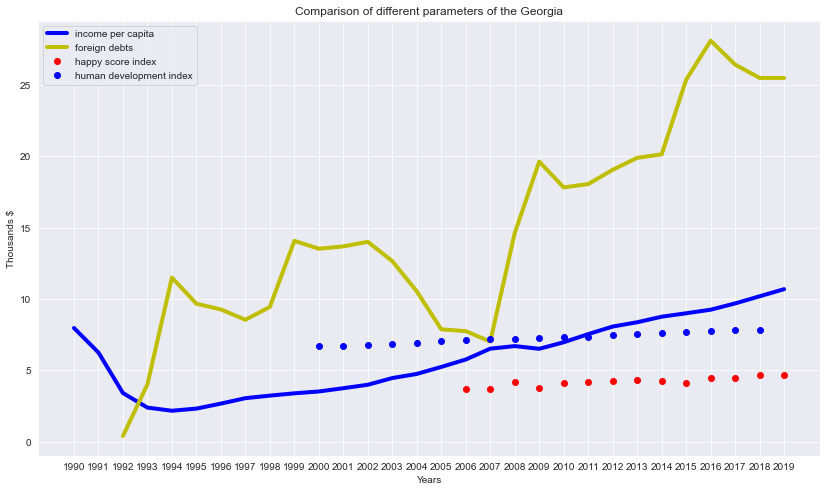

In [269]:
plotting(georgia_df,'Georgia')

In [270]:
turkmenistan_df.corr()

,happy_score,foreign_depts,electricity_generated,human_develop,income_per_capita,population_total,trade_balance
happy_score,1.000000,0.340848,-0.657828,-0.426498,-0.745781,-0.741138,-0.481381
foreign_depts,0.340848,1.000000,-0.780157,-0.344635,-0.632650,-0.552661,-0.108801
electricity_generated,-0.657828,-0.780157,1.000000,0.973890,0.862542,0.509604,-0.071120
human_develop,-0.426498,-0.344635,0.973890,1.000000,0.996483,0.988308,-0.319074
income_per_capita,-0.745781,-0.632650,0.862542,0.996483,1.000000,0.856482,-0.150763
population_total,-0.741138,-0.552661,0.509604,0.988308,0.856482,1.000000,-0.153458
trade_balance,-0.481381,-0.108801,-0.071120,-0.319074,-0.150763,-0.153458,1.000000


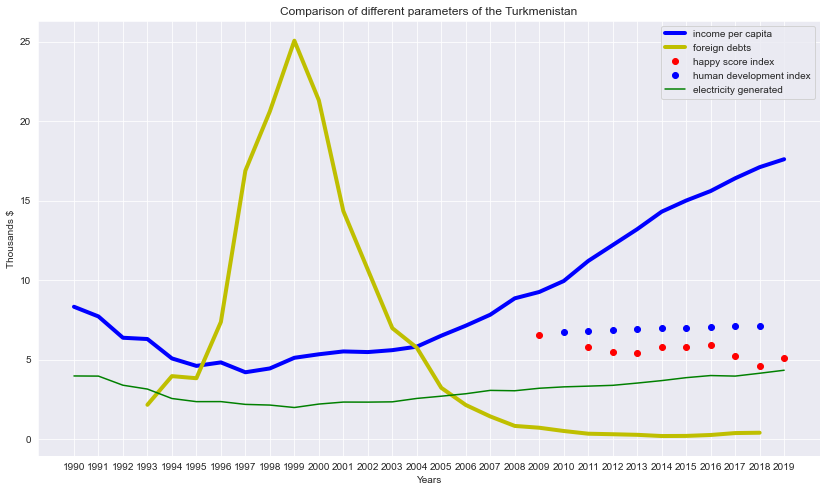

In [271]:
plotting(turkmenistan_df,'Turkmenistan')

In [272]:
botswana_df.corr()

,happy_score,foreign_depts,human_develop,income_per_capita,population_total,trade_balance
happy_score,1.000000,-0.330632,-0.661959,-0.542870,-0.703735,-0.044450
foreign_depts,-0.330632,1.000000,-0.188135,-0.447443,-0.517799,-0.290434
human_develop,-0.661959,-0.188135,1.000000,0.961392,0.924429,-0.365813
income_per_capita,-0.542870,-0.447443,0.961392,1.000000,0.978343,-0.297279
population_total,-0.703735,-0.517799,0.924429,0.978343,1.000000,-0.331160
trade_balance,-0.044450,-0.290434,-0.365813,-0.297279,-0.331160,1.000000


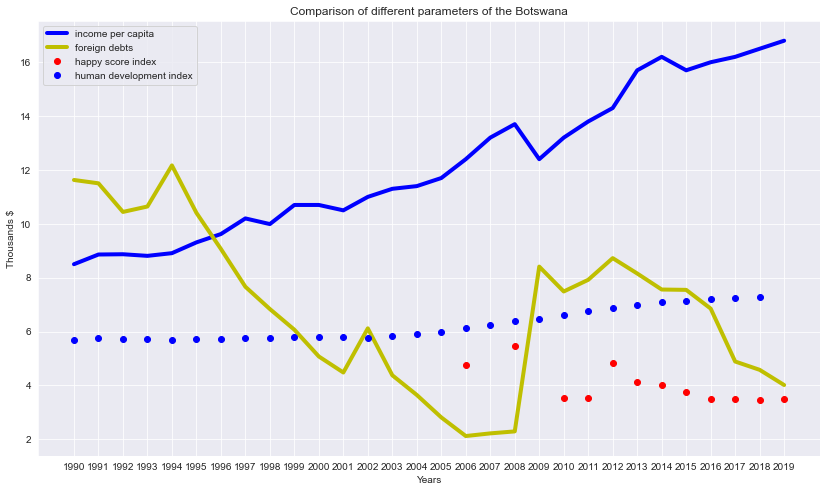

In [273]:
plotting(botswana_df,'Botswana')

Interesting observation: income per capita in all countries have really big correlation with human develop index. Also there good correlation with foreign debts, but exception there is Turkmenistan and Botswana

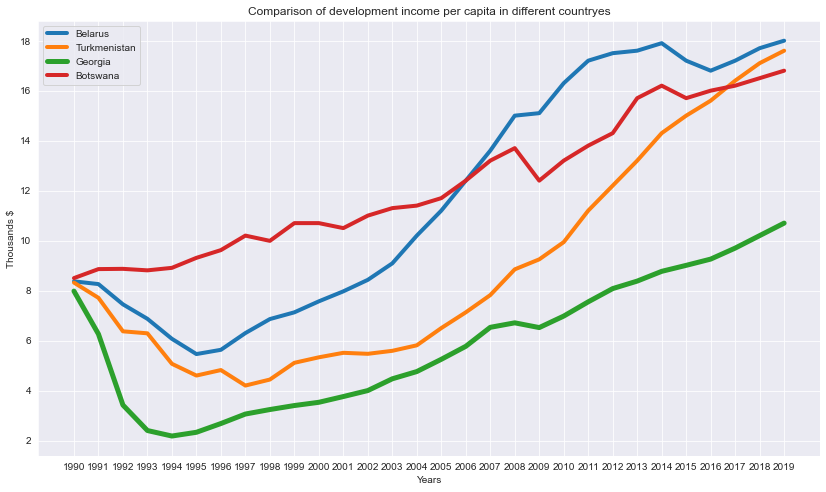

In [274]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
plt.plot(belarus_df.income_per_capita,label = 'Belarus', lw = 4)
plt.plot(turkmenistan_df.income_per_capita,label = 'Turkmenistan', lw = 4)
plt.plot(georgia_df.income_per_capita,label = 'Georgia', lw = 5)
plt.plot(botswana_df.income_per_capita, label = 'Botswana', lw =4)
plt.xlabel('Years')
plt.ylabel('Thousands $')
plt.title('Comparison of development income per capita in different countryes')
plt.legend()

<a id='conclusions'></a>
## Conclusions
For this project, I used datasets: Per capita income, Debt to foreign investors, Generated electricity, Happiness Index, Human Development Index, Trade Balance, and Total Population. What interests me most is how “per capita income” has been growing in Belarus since 1990, and I also wanted to find out which parameters have the greatest impact on this growth. The second question was how quickly countries with the same per capita income as Belarus in 1990 are growing.

To answer these questions, first of all, I created a Belarus data frame that contains all the values ​​from the datasets I selected. Subsequently, data frames were created containing values ​​for the rest of the countries, whose per capita income was approximately the same as in Belarus in 1990.

When clearing the data, I decided to store all the data in the per capita format, and I also decided to make all the indexes for storage in the 0-10 format. In part, these decisions were made to make the visualization a bit easier, but it also makes comparisons between countries easier.

I decided not to fill the indices with zero values ​​as there could be many different cases in the missing periods that could affect these values, so filling them using the mean or regression may give us incorrect results.

As can be seen from the graphs and correlation menus, in each country, the human development index has the greatest impact on income.

I also wanted to know how Belarus is growing among other countries with the same per capita income as Belarus in 1990.

From the graphs and data frames, we could see that Belarus has succeeded and since 2007 has become the leader among these countries.

One thing to mention - the raw data has some bias, so the raw data on per capita income contains information up to 2040, and the total population is up to 2100 ... So I'm not sure if I can rely on this data.